# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_name = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
cloudiness=[]
temp=[]
weather_key = "9ca84a54fb6651a751db708cf86ceea3"

url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_key + "&q="
query_url
    

'http://api.openweathermap.org/data/2.5/weather?appid=9ca84a54fb6651a751db708cf86ceea3&q='

In [4]:
index = 0
for city in cities: 
    print(f"Processing Record {index} {city}")
    
    response = requests.get(query_url + city).json()
    
    try:
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
    except:
        print("Skipping. No Value")
        pass
    index += 1

Processing Record 0 dikson
Processing Record 1 punta arenas
Processing Record 2 mar del plata
Processing Record 3 carnarvon
Processing Record 4 cangzhou
Processing Record 5 saint-philippe
Processing Record 6 poum
Processing Record 7 ushuaia
Processing Record 8 cape town
Processing Record 9 dvinskoy
Processing Record 10 mecca
Processing Record 11 srednekolymsk
Processing Record 12 port lavaca
Processing Record 13 gbarnga
Processing Record 14 bairiki
Processing Record 15 mount gambier
Processing Record 16 illoqqortoormiut
Skipping. No Value
Processing Record 17 albany
Processing Record 18 adrar
Processing Record 19 pevek
Processing Record 20 sao joao da barra
Processing Record 21 benicarlo
Processing Record 22 new norfolk
Processing Record 23 urambo
Processing Record 24 qaanaaq
Processing Record 25 vaini
Processing Record 26 nanortalik
Processing Record 27 bur gabo
Skipping. No Value
Processing Record 28 mao
Processing Record 29 kutum
Processing Record 30 dingle
Processing Record 31 cara

Processing Record 251 byron bay
Processing Record 252 honiara
Processing Record 253 charcas
Processing Record 254 auki
Processing Record 255 naze
Processing Record 256 fairbanks
Processing Record 257 kobelyaky
Processing Record 258 loma alta
Processing Record 259 manokwari
Processing Record 260 oskarshamn
Processing Record 261 sisimiut
Processing Record 262 nizhneyansk
Skipping. No Value
Processing Record 263 scarborough
Processing Record 264 weihe
Processing Record 265 hilo
Processing Record 266 casino
Processing Record 267 soyo
Processing Record 268 ostrovnoy
Processing Record 269 dong hoi
Processing Record 270 zubtsov
Processing Record 271 hualmay
Processing Record 272 souillac
Processing Record 273 san patricio
Processing Record 274 lagoa
Processing Record 275 yumen
Processing Record 276 jarjis
Skipping. No Value
Processing Record 277 yulara
Processing Record 278 maningrida
Processing Record 279 guadalajara
Processing Record 280 hornepayne
Processing Record 281 conceicao do araguai

Processing Record 501 khani
Processing Record 502 taltal
Processing Record 503 orumiyeh
Processing Record 504 manggar
Processing Record 505 disna
Processing Record 506 touros
Processing Record 507 beringovskiy
Processing Record 508 saint andrews
Processing Record 509 ossora
Processing Record 510 port arthur
Processing Record 511 ust-maya
Processing Record 512 kysyl-syr
Processing Record 513 lahr
Processing Record 514 marsh harbour
Processing Record 515 progreso
Processing Record 516 nagato
Processing Record 517 makinsk
Processing Record 518 champerico
Processing Record 519 ankazoabo
Processing Record 520 fleury-merogis
Processing Record 521 kodinsk
Processing Record 522 port blair
Processing Record 523 luganville
Processing Record 524 flin flon
Processing Record 525 augustow
Processing Record 526 dobrinka
Processing Record 527 bengkulu
Processing Record 528 kimbe
Processing Record 529 kulhudhuffushi
Processing Record 530 cagayan de tawi-tawi
Skipping. No Value
Processing Record 531 hen

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dictionary = {
    "City":city_name,
    "Cloudiness": cloudiness,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":max_temp,
    "Wind Speed":wind_speed,
}

In [6]:
weatherdf = pd.DataFrame(weather_dictionary)
weatherdf

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Dikson,100,RU,1580798053,95,73.51,80.55,252.86,6.74
1,Punta Arenas,75,CL,1580798053,87,-53.15,-70.92,280.15,2.60
2,Mar del Plata,0,AR,1580797784,94,-38.00,-57.56,295.37,5.70
3,Carnarvon,0,AU,1580798053,78,-24.87,113.63,300.15,6.20
4,Cangzhou,9,CN,1580797886,39,38.32,116.87,273.42,6.83
...,...,...,...,...,...,...,...,...,...
563,Santo Tomas,20,PH,1580798167,54,14.11,121.14,303.15,2.60
564,Cabimas,25,VE,1580798167,70,10.39,-71.44,299.61,5.45
565,Taseyevo,100,RU,1580798167,94,57.22,94.90,260.93,1.67
566,Suzun,100,RU,1580797924,93,53.78,82.31,266.61,4.14


In [ ]:
exportcsv = weatherdf.to_csv (/)

In [7]:
fahrenheitchange = (weatherdf["Max Temp"] * (9/5) - 459.67)
fahrenheitchange

0      -4.522
1      44.600
2      71.996
3      80.600
4      32.486
        ...  
563    86.000
564    79.628
565    10.004
566    20.228
567    86.000
Name: Max Temp, Length: 568, dtype: float64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

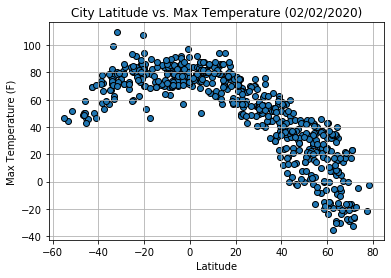

In [8]:
plt.scatter(weatherdf["Lat"], fahrenheitchange,edgecolors="black")
plt.title("City Latitude vs. Max Temperature (02/02/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

#### Latitude vs. Humidity Plot

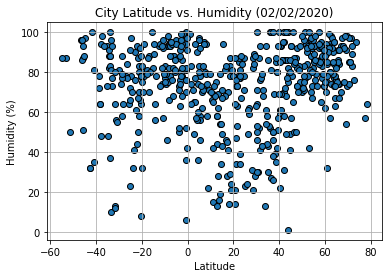

In [9]:
plt.scatter(weatherdf["Lat"], weatherdf["Humidity"],edgecolors="black")
plt.title("City Latitude vs. Humidity (02/02/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)




#### Latitude vs. Cloudiness Plot

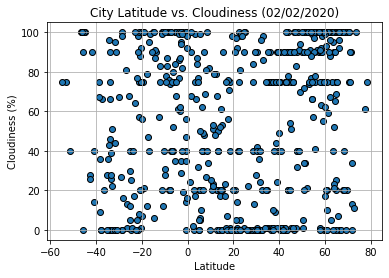

In [10]:
plt.scatter(weatherdf["Lat"], weatherdf["Cloudiness"],edgecolors="black")
plt.title("City Latitude vs. Cloudiness (02/02/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#### Latitude vs. Wind Speed Plot

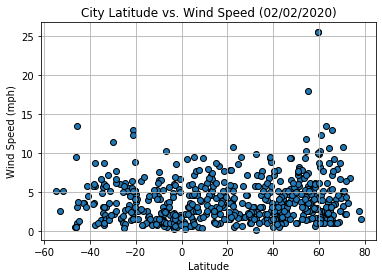

In [11]:
plt.scatter(weatherdf["Lat"], weatherdf["Wind Speed"],edgecolors="black")
plt.title("City Latitude vs. Wind Speed (02/02/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots


In [13]:
# Create Northern and Southern Hemisphere DataFrames


In [14]:
import scipy.stats as st


In [15]:
northhemis = weatherdf.loc[weatherdf["Lat"] >= 0]
northhemis


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Dikson,100,RU,1580798053,95,73.51,80.55,252.86,6.74
4,Cangzhou,9,CN,1580797886,39,38.32,116.87,273.42,6.83
9,Dvinskoy,67,RU,1580798054,94,62.15,45.12,259.82,1.62
10,Mecca,92,SA,1580798054,63,21.43,39.83,294.28,1.72
11,Srednekolymsk,100,RU,1580798054,97,67.45,153.68,243.34,4.11
...,...,...,...,...,...,...,...,...,...
563,Santo Tomas,20,PH,1580798167,54,14.11,121.14,303.15,2.60
564,Cabimas,25,VE,1580798167,70,10.39,-71.44,299.61,5.45
565,Taseyevo,100,RU,1580798167,94,57.22,94.90,260.93,1.67
566,Suzun,100,RU,1580797924,93,53.78,82.31,266.61,4.14


In [16]:
southhemis = weatherdf.loc[weatherdf["Lat"] < 0]
southhemis

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Punta Arenas,75,CL,1580798053,87,-53.15,-70.92,280.15,2.60
2,Mar del Plata,0,AR,1580797784,94,-38.00,-57.56,295.37,5.70
3,Carnarvon,0,AU,1580798053,78,-24.87,113.63,300.15,6.20
5,Saint-Philippe,57,RE,1580798053,70,-21.36,55.77,303.15,12.90
6,Poum,100,NC,1580798054,81,-20.23,164.02,299.50,8.89
...,...,...,...,...,...,...,...,...,...
531,Buritizeiro,47,BR,1580798161,87,-17.35,-44.96,293.51,0.78
532,Vanimo,99,PG,1580798161,82,-2.67,141.30,301.14,6.97
533,Pangkalanbuun,82,ID,1580798161,68,-2.68,111.62,303.92,2.07
536,Tadine,90,NC,1580798162,67,-21.55,167.88,300.10,5.44


In [17]:
fahrenheitchangenorth = (northhemis["Max Temp"] * (9/5) - 459.67)
fahrenheitchangenorth

0      -4.522
4      32.486
9       8.006
10     70.034
11    -21.658
        ...  
563    86.000
564    79.628
565    10.004
566    20.228
567    86.000
Name: Max Temp, Length: 381, dtype: float64

In [18]:
fahrenheitchangesouth = (southhemis["Max Temp"] * (9/5) - 459.67)
fahrenheitchangesouth

1      44.600
2      71.996
3      80.600
5      86.000
6      79.430
        ...  
531    68.648
532    82.382
533    87.386
536    80.510
553    89.006
Name: Max Temp, Length: 187, dtype: float64

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8776739129013944


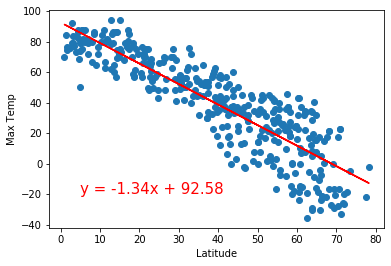

In [27]:
x_values = northhemis["Lat"]
y_values = fahrenheitchangenorth
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
correlation = st.pearsonr(x_values,y_values)
plt.annotate(line_eq,(5,-20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5013473942225493


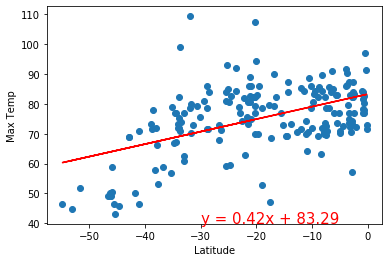

In [28]:
x_values = southhemis["Lat"]
y_values = fahrenheitchangesouth
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
correlation = st.pearsonr(x_values,y_values)
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.37463759404675684


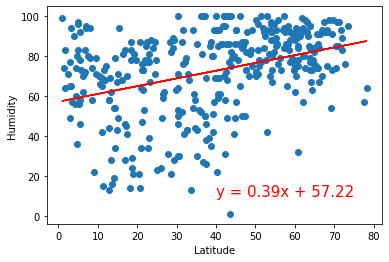

In [29]:
x_values = northhemis["Lat"]
y_values = northhemis["Humidity"]
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
correlation = st.pearsonr(x_values,y_values)
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.13125872022258694


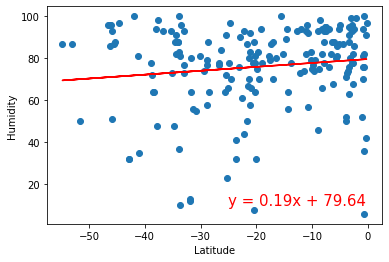

In [30]:
x_values = southhemis["Lat"]
y_values = southhemis["Humidity"]
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
correlation = st.pearsonr(x_values,y_values)
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3014181850734969


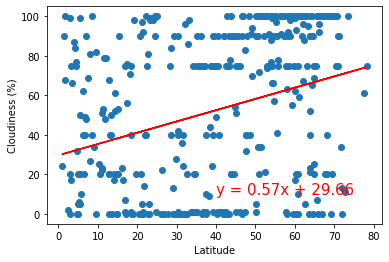

In [31]:
x_values = northhemis["Lat"]
y_values = northhemis["Cloudiness"]
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
correlation = st.pearsonr(x_values,y_values)
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.24120329492676254


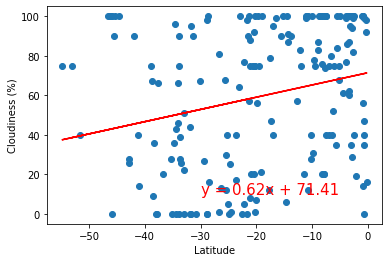

In [32]:
x_values = southhemis["Lat"]
y_values = southhemis["Cloudiness"]
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
correlation = st.pearsonr(x_values,y_values)
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1280006051859636


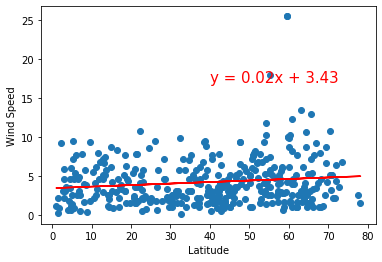

In [33]:
x_values = northhemis["Lat"]
y_values = northhemis["Wind Speed"]
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
correlation = st.pearsonr(x_values,y_values)
plt.annotate(line_eq,(40,17),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.21312868114657563


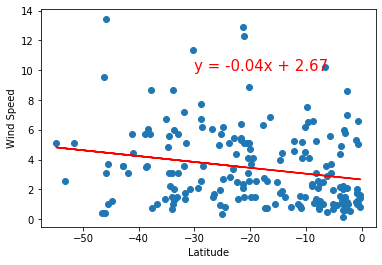

In [34]:
x_values = southhemis["Lat"]
y_values = southhemis["Wind Speed"]
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
correlation = st.pearsonr(x_values,y_values)
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
